# Effect of Income Range of Prosper Loans

## by Sheiyohn Arunthavanathan

This document explores a dataset containing individual loan listing with about 113,066 records.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#reading the loan prosper data
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#changing the display to show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = 20
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
#setting all date columns to datetime objects
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
df.DateCreditPulled = pd.to_datetime(df.DateCreditPulled)
df.FirstRecordedCreditLine = pd.to_datetime(df.FirstRecordedCreditLine)
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
df.ClosedDate = pd.to_datetime(df.ClosedDate)

#cleaning column names
df.columns = df.columns.str.replace(" ","")
df.columns = df.columns.str.replace("(","")
df.columns = df.columns.str.replace(")","")

#mapping the Listing Category keys to their string value
df["ListingCategoryName"] = df.ListingCategorynumeric.map({0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 3 : "Business", 4 : "Personal Loan", 5 : "Student Use", 6 : "Auto", 7 : "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure", 11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses", 14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV", 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"})
#checking for any duplicated listings and dropping them
df.drop(index = df[df.ListingKey.duplicated()].index, inplace=True)



/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


In [5]:
#mapping the Listing Category keys to their string value
df["ListingCategoryName"] = df.ListingCategorynumeric.map({0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 3 : "Business", 4 : "Personal Loan", 5 : "Student Use", 6 : "Auto", 7 : "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure", 11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses", 14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV", 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"})

In [6]:

#checking for any duplicated listings and dropping them
df.drop(index = df[df.ListingKey.duplicated()].index, inplace=True)

In [7]:
#checking to see if there are multiple values made by the same member
df[df.MemberKey.duplicated(keep = False)].sort_values('MemberKey')


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRatingnumeric,ProsperRatingAlpha,ProsperScore,ListingCategorynumeric,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquentpercentage,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategoryName
88538,9ED23413856939652941A08,289122,2008-03-06 03:50:20.490,AA,36,Completed,2009-03-23,0.09588,0.0890,0.0890,NaN,NaN,NaN,NaN,NaN,NaN,1,NY,Retail Management,Full-time,90.0,True,False,NaN,2008-03-06 03:43:05.947,780.0,799.0,1985-06-01,14.0,13.0,38.0,11,445.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,48682.0,0.47,53061.0,36.0,1.00,2.0,0.05000,"$100,000+",True,14583.333333,B5173414406716909D4F187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,72,28375,5000,2008-03-12,Q1 2008,000C338268418759483EBC3,158.77,5365.04,5000.00,365.04,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,105,Debt Consolidation
109184,676E352982312435046D7DB,535314,2011-10-25 06:13:29.817,NaN,12,Completed,2012-10-27,0.06589,0.0565,0.0465,0.0466,0.0085,0.0381,7.0,AA,10.0,7,NY,Retail Management,Employed,133.0,False,False,NaN,2011-10-21 03:34:21.000,800.0,819.0,1985-06-01,13.0,9.0,37.0,8,199.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9885.0,0.13,64315.0,36.0,1.00,1.0,0.06000,"$100,000+",True,17916.666667,3E773632779691591DA5A91,2.0,16.0,15.0,1.0,0.0,20000.0,0.02,20.0,0,NaN,29,55052,5000,2011-10-27,Q4 2011,000C338268418759483EBC3,429.53,5154.86,5000.00,154.86,-27.41,0.00,0.00,0.00,0.0,1.0,0,0,0.0,25,Other
11228,173534316462844640E64B2,400245,2008-09-18 05:32:11.753,AA,36,Completed,2009-02-24,0.11094,0.1040,0.0940,NaN,NaN,NaN,NaN,NaN,NaN,6,NY,Retail Management,Full-time,96.0,False,False,NaN,2008-09-17 19:03:29.553,780.0,799.0,1985-06-01,14.0,9.0,39.0,7,212.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,11770.0,0.17,45482.0,37.0,1.00,1.0,0.08000,"$100,000+",True,16250.000000,9B453433028560650BD7804,1.0,6.0,6.0,0.0,0.0,5000.0,3855.69,0.0,0,NaN,66,37165,15000,2008-09-29,Q3 2008,000C338268418759483EBC3,486.83,15593.65,15000.00,593.65,-57.08,0.00,0.00,0.00,0.0,1.0,0,0,0.0,741,Auto
16399,129E3532086938389ACF92E,539239,2011-11-15 13:18:07.723,NaN,36,Completed,2012-06-06,0.29510,0.2599,0.2499,0.2437,0.1120,0.1317,3.0,D,6.0,2,IL,Medical Technician,Employed,9.0,False,False,NaN,2011-11-15 13:18:03.000,740.0,759.0,1989-03-02,4.0,3.0,24.0,2,35.0,2.0,3.0,1.0,0.0,8.0,1.0,0.0,803.0,0.58,413.0,19.0,0.89,1.0,0.23000,"$1-24,999",True,2041.666667,BB2E3634945329365C7CC56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,28,56554,3000,2011-11-25,Q4 2011,001435319012273727664D9,120.86,3392.77,3000.00,392.77,-15.12,0.00,0.00,0.00,0.0,1.0,0,0,0.0,28,Home Improvement
68467,AB953549367034834F92BD8,594656,2012-05-31 07:46:18.200,NaN,60,Completed,2013-04-23,0.28704,0.2610,0.2510,0.2448,0.

In [8]:
df.ListingCreationDate.describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                         113066
unique                        113064
top       2013-06-03 17:27:50.540000
freq                               2
first     2005-11-09 20:44:28.847000
last      2014-03-10 12:20:53.760000
Name: ListingCreationDate, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113066 non-null  object        
 1   ListingNumber                        113066 non-null  int64         
 2   ListingCreationDate                  113066 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113066 non-null  int64         
 5   LoanStatus                           113066 non-null  object        
 6   ClosedDate                           55076 non-null   datetime64[ns]
 7   BorrowerAPR                          113041 non-null  float64       
 8   BorrowerRate                         113066 non-null  float64       
 9   LenderYield                          113066 non-null  float64       
 

### What is the structure of your dataset?

> The Prosper Loan Dataset provides us information of every loan listing made between Nov 2005 to March 2014. The dataset consists of 113066 entries with 81 distinct columns representing unique key information. The data columns consists of mostly float entries, with occasional int, datetime and standard objects.

### What is/are the main feature(s) of interest in your dataset?

> The above dataset provides us with a large database that wil help us identify the demographic that rely on this P2P loan service and how often they are repeat users. Also, we should able to identify if the demographic has an effect on their APR and Interest rate. Plus, we should be able to identify what is the likelihood of a member to default or have delinquencies for the loan lisitng and if future loans should be allowed for these types of members.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features of interest in this data set is to identiy the demographic in terms of income range and see how income range of a borrower can relate to monthly loan payments, the APR they receive, Prosper Rating level, occupation, state of origin and reason for a loan.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 1.0, 'Loan Listing for 9 years for each State')

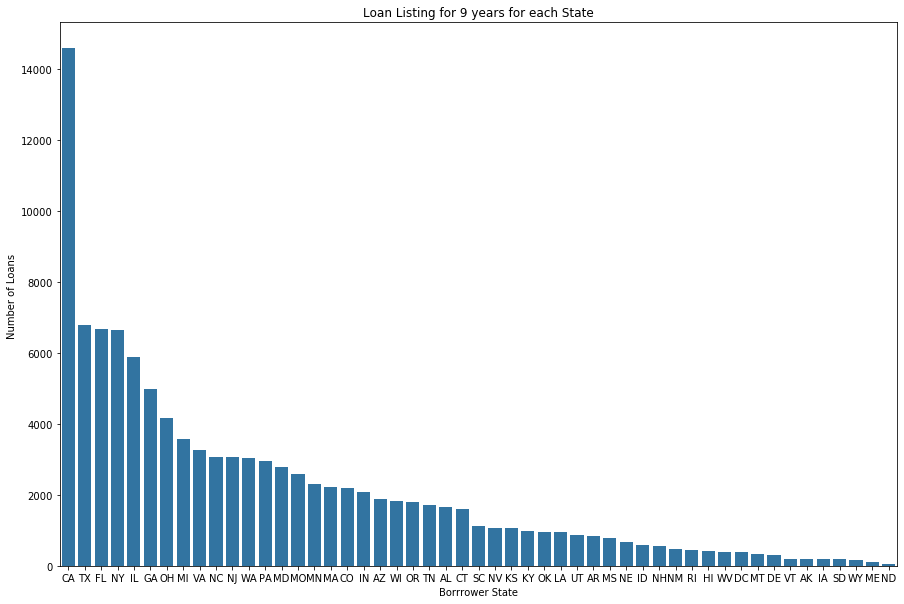

In [10]:
df.groupby("LoanStatus").BorrowerState.value_counts()
plt.subplots(figsize=(15,10))
sb.barplot(x = df.BorrowerState.value_counts().index, y = df.BorrowerState.value_counts(), color = sb.color_palette()[0])
plt.xlabel("Borrrower State")
plt.ylabel("Number of Loans ")
plt.title("Loan Listing for 9 years for each State")

## Loans listing Made by Each States

Number of Loan Listing across all states in the United States help us identify which states population rely on P2P lending. We can identify the state of California has the highest listing count, which is two times more than the second highest state, Texas. North Dakota has the least number of loan listings. 

Next we try to identify the most common reason people take out Prosper Loans.

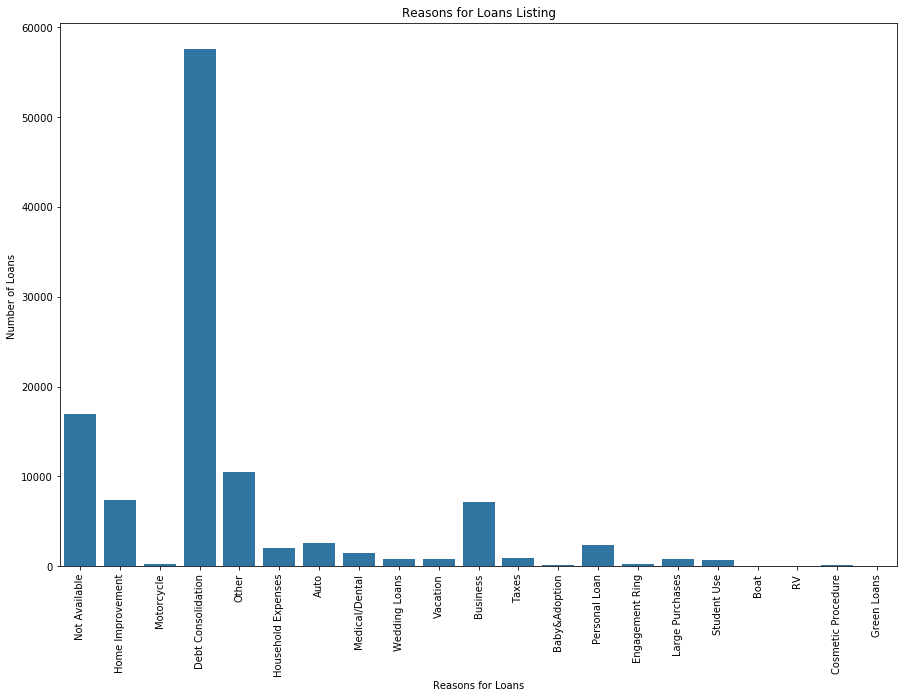

In [11]:
plt.figure(figsize =[15,22])
plt.subplot(2,1,1)
sb.countplot(x =df.ListingCategoryName, color = sb.color_palette()[0])
plt.xticks(rotation =90);
plt.xlabel("Reasons for Loans")
plt.ylabel("Number of Loans ")
plt.title("Reasons for Loans Listing");

## Identify the most common reason for loans

Debt Consolidation is the most common reason that people tend to take out these P2P loans. Other common reasoning includes Business related and home improvement loans. The loans taken out for comestic procedure, boats, RV and green loans.

Next, we will try to identify the distribution of loan amounts that have been listed.

In [12]:
#removing outliers
df=df[df.LoanOriginalAmount<25000]

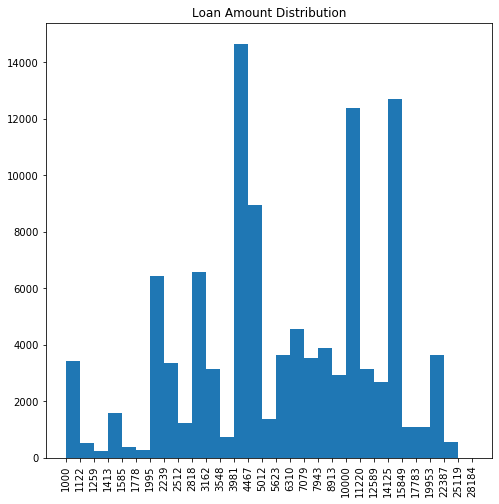

In [13]:
#plotting the distribution of Loan Amount
loanlog = np.log10(df.LoanOriginalAmount)

plt.figure(figsize=[8,8])
bins= np.arange(loanlog.min(), loanlog.max()+0.1, 0.05)
plt.hist(x = loanlog, bins=bins)
#sb.histplot(x = loanlog, bins=bins)
ticks_bin=list(10**bins)
labels=['{:0.0f}'.format(i) for i in ticks_bin]
plt.xticks(bins,labels, rotation=90)
plt.title("Loan Amount Distribution");


## Distribution of Loan Amount Requested.

Loan amount distribution is heavily multi-modal, where we can identify the 3 most commonly requested loan amounts are at USD4467, USD15,500 and USD11,000. Loan amounts exceeding USD23,000 are less likely to be requested while loan amounts less than USD2000 has more frequent request at rounded of numbers at USD1100 and USD2000.

Now, we will try to identify the distribution of the APR for these loan amounts.

In [14]:
#removing outliers
df = df[df.BorrowerAPR <0.44]
df.BorrowerAPR.describe()

count    108783.000000
mean          0.220800
std           0.081066
min           0.006530
25%           0.157130
50%           0.212900
75%           0.287260
max           0.423950
Name: BorrowerAPR, dtype: float64

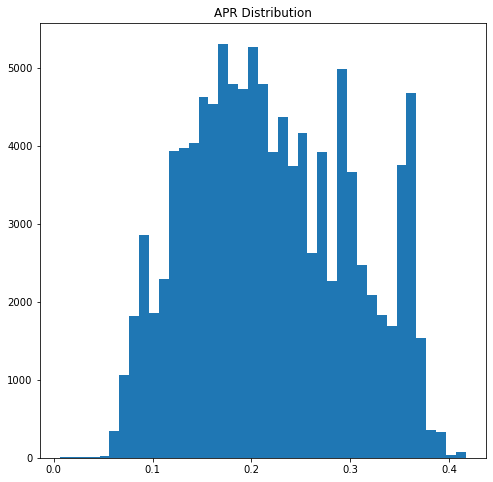

In [15]:
#plotting the distribution of borrower APR
plt.figure(figsize=[8,8])
bin_edges = np.arange(0.006530,0.423950,0.01)
plt.hist(data = df, x='BorrowerAPR', bins = bin_edges)
plt.title('APR Distribution');

## Distribution of Borrowers APR

The distribution of APR is multi-modal, however most of the APR is concentrated between 0.18 to 0.26. There are distinct peaks around 0.29-0.3 and 0.37.

Next we look in to the distribution of monthly income.

In [16]:
df.StatedMonthlyIncome.describe()

count    1.087830e+05
mean     5.399844e+03
std      7.414537e+03
min      0.000000e+00
25%      3.166667e+03
50%      4.583333e+03
75%      6.666667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [17]:
#removing outliers
df = df[df.StatedMonthlyIncome <70000]

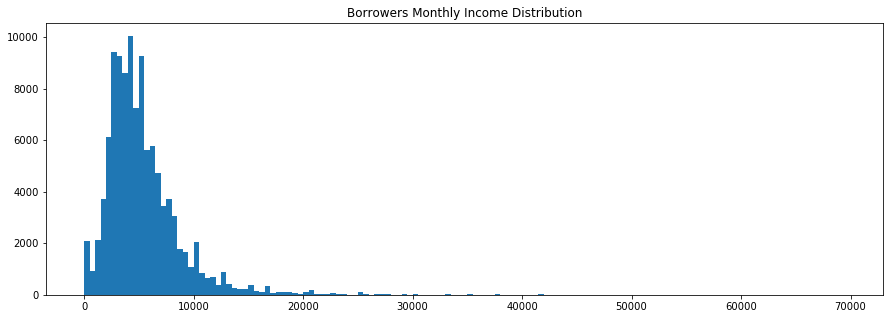

In [18]:
bin_edges = np.arange(0.0,70000,500)
plt.figure(figsize =[15,5])
plt.hist(data = df, x='StatedMonthlyIncome', bins = bin_edges)
plt.title('Borrowers Monthly Income Distribution');

## Distribution of Borrowers Monthly Income

The distribution of the borrowers Monthly Income is left skewed. This tells us that most Prosper borrowers are from low and medium income range.People with monthly income less than USD 8,000 are more likey to take prosper loans, especially those who earn between USD 3,000 and USD 6,000. Income earners earning more than USD 10,000 are very unliekly to take out prosper loans.

Next we look in to how Income Range is distributed across every state, if it has an effect on the APR and what common income range takes a particular loan. We also, look in to whether income has an effect if a person will default on their payments.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Monthly income, Borrowers APR, Loan Amount are the key variables that we chose to describe in this dataset. Based on the distribution of Borrower APR, we can fairly say that it is evenly distributed compared to the monthly income of the borrower. THe loan amount distribution showed a multi-modal distribution with peaks at distinct loan amounts. The Loan Amount did go through a log tranformation, which enabled us to visualize this distribution smoothly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Additionally, the number loans per state and the reason for loans were plotted. It was identified that the state of California had the highest loan listings, almost double of the latter most state. While, Debt consolidation was the most opted reason for taking out these loans. Duplicated listings were identified and removed from the database at the start. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

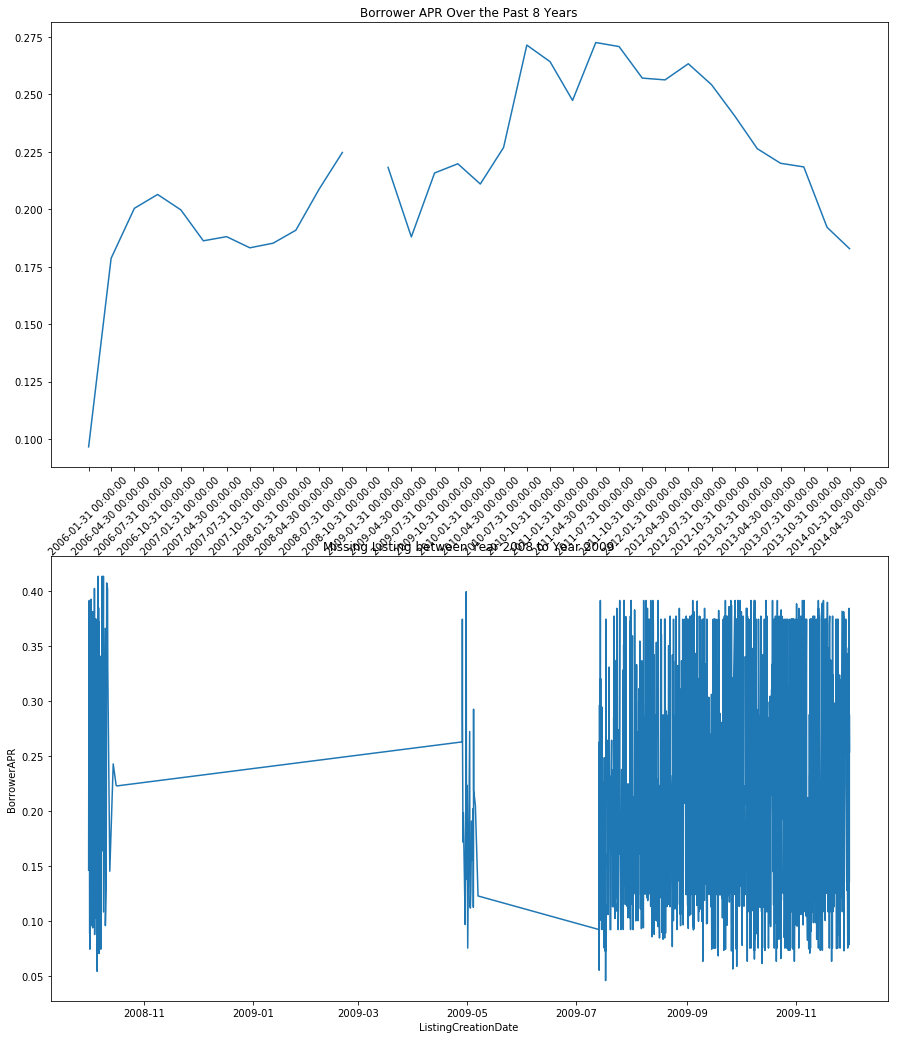

In [20]:
#setting quarterly time frequency
quarterly = df.set_index("ListingCreationDate").resample('Q-JAN', convention='end')['BorrowerAPR'].mean()
plt.figure(figsize=[15,18])
plt.subplot(2,1,1)
plt.plot(quarterly.index, quarterly)
plt.xticks(quarterly.index, list(quarterly.index), rotation=45);
plt.title('Borrower APR Over the Past 8 Years')

#plotting 
missing = df.query("ListingCreationDate >= '2008-10' and ListingCreationDate <= '2009-12' ")
plt.subplot(2,1,2)
sb.lineplot(data = missing, x='ListingCreationDate', y="BorrowerAPR")
plt.title('Missing Listing between Year 2008 to Year 2009');

## Borrower APR Changes Over Time

Within the first 2 quarters of year 2006, the APR rate doubled and it slowly rose to its peak at 0.275 rate on year 2011. From the year 2011, the rate starts to gradually decrease. We also note that there has been no Listings created between the Nov 2008 to Jul 2009, with only a handful of lisitngs made on May 2009. 

Text(0.5, 1.0, 'Borrower APR vs Stated Monthly Income')

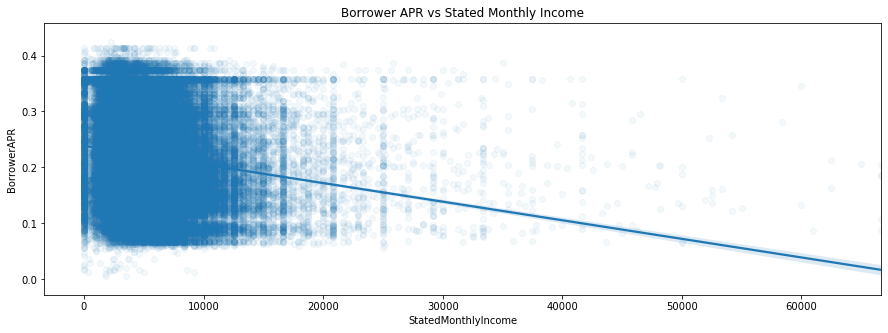

In [21]:
#checking for correlation between APR and monthly income
plt.figure(figsize=[15,5])
sb.regplot( x=df.StatedMonthlyIncome, y=df.BorrowerAPR, scatter_kws={'alpha':1/20})
plt.title('Borrower APR vs Stated Monthly Income')

In [22]:
df.StatedMonthlyIncome.corr(df.BorrowerAPR)

-0.1495129502713087

## Borrowers APR compared to Stated Monthly Income

It is evident that there is a negative correlation coefficient between Borrowers APR and Monthly Income, i.e. if the stated monthly income is higher, the borrower APR is more likely to lower. The correlation coefficient is -0.15

In [23]:
df.IncomeRange.value_counts()

$25,000-49,999    31833
$50,000-74,999    30465
$75,000-99,999    15715
$100,000+         14596
Not displayed      7525
$1-24,999          7217
Not employed        805
$0                  586
Name: IncomeRange, dtype: int64

In [24]:
#creating a data copy
df_2 = df.copy()

In [25]:
#amending incomes not displaying based on stated monthly income
df_2['AnnualSalary'] = df_2["StatedMonthlyIncome"]*12


def calc(i):
    if i > 99999:
        return  '$100,000+'
    elif i>75000 and i<=99999:
        return '$75,000-99,999'
    elif i>50000 and i<=74999:
        return "$50,000-74,999"
    elif i>25000 and i<=50000:
        return "$25,000-49,999"
    elif i>0 and i<=24999:
        return "$1-24,999"
    else:
        return "Unemployed"

df_2['IncomeRange'] = df_2['AnnualSalary'].apply(calc)

df_2['IncomeRange'].value_counts()

$25,000-49,999    33538
$50,000-74,999    32137
$100,000+         15342
$75,000-99,999    14303
$1-24,999          8594
Unemployed         4828
Name: IncomeRange, dtype: int64

In [26]:
#classifying income range as an ordered category
income_range= ['Unemployed',"$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+" ]
incomeclasses = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
df_2.IncomeRange=df_2.IncomeRange.astype(incomeclasses)

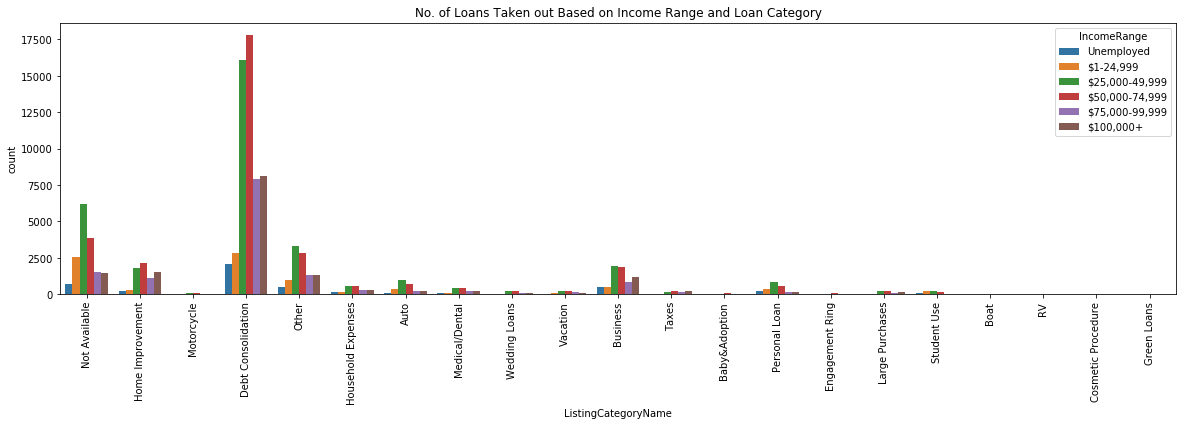

In [27]:
plt.figure(figsize=[20,5])
sb.countplot(x =df_2.ListingCategoryName, hue=df_2.IncomeRange)
plt.xticks(rotation=90);
plt.title("No. of Loans Taken out Based on Income Range and Loan Category");

## How does Income Range compare with the reason for Loan

The main reason for listings for all income ranges is Debt Consolidation. The other 2 most common reason is for Home Improvement and Business, while the least likely reason is for a boat, RV, Cosmetic Procedure and Green loans.
Low income earners earning less than USD 25000 are less likely to take out a loan, if they do so it will be for Debt Consolidation or for unstated reason. Average income earners between USD 25,000 to USD 75,000 are the most likely to take out loans.It is suprisign to notice that even high income earners USD 100,000+ take out loans for Debt Consolidation.

In [28]:
state_counts = df_2.groupby(['BorrowerState', "IncomeRange"]).size()
state_counts = state_counts.reset_index(name='count')
state_counts = state_counts.pivot(index="BorrowerState", columns ="IncomeRange", values="count")
#state_counts

<Figure size 1152x576 with 0 Axes>

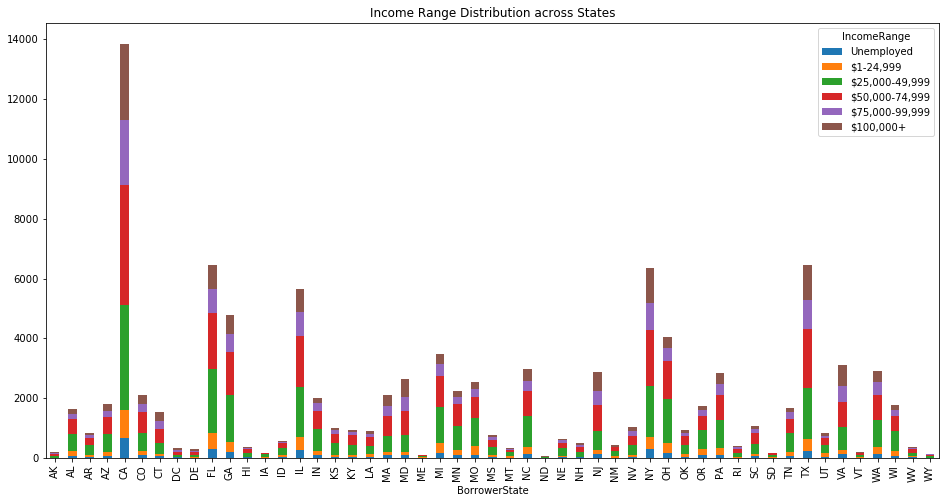

In [29]:
#state_df = df_2.groupby(['BorrowerState', 'IncomeRange']).size()
plt.figure(figsize=[16,8])
state_counts.plot.bar(stacked = True,figsize=[16,8]);
plt.title('Income Range Distribution across States');

## Income Range Distribution Across States

Borrowers income distribution across states shows that most borrowers in each state come from the USD25000-49999 and USD50000-74999. 

<Figure size 1152x576 with 0 Axes>

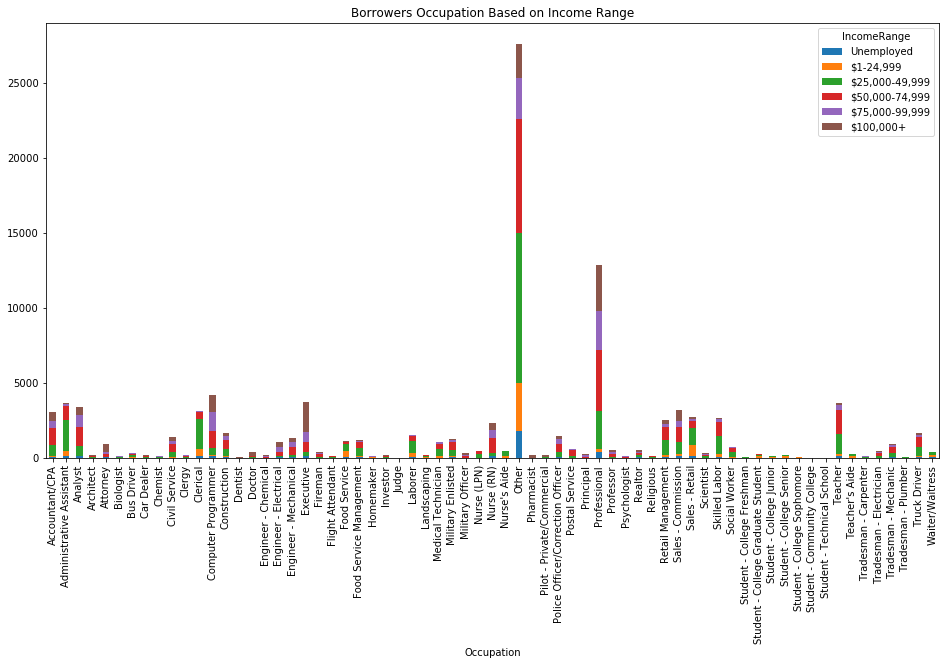

In [30]:
occu_counts=df_2.groupby(['Occupation', 'IncomeRange']).size()
occu_counts = occu_counts.reset_index(name='count')
occu_counts = occu_counts.pivot(index="Occupation", columns ="IncomeRange", values="count")
plt.figure(figsize=[16,8])
occu_counts.plot.bar(stacked = True,figsize=[16,8]);
plt.xticks(rotation=90);
plt.title("Borrowers Occupation Based on Income Range");

## Borrower's Occupation Based on Income Range

The large number of borrowers have not stated there occupation and place it as "Other", espceially in the income range of USD25000-49999 and USD50000-74999. Most skilled labour show a lower frequency in acquiring P2P loans such as Prosper loans. We can also notice that Student who have taken P2P loans are quite low.

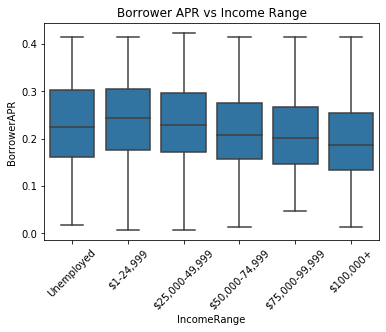

In [31]:
sb.boxplot(x=df_2.IncomeRange, y =df_2.BorrowerAPR, color = sb.color_palette()[0])
plt.xticks(rotation=45);
plt.title('Borrower APR vs Income Range');

## Comparing Borrower APR to Income Range

We notice that the Borrowers APR decreases as the income range increases, this is clearly visible in the downward trend of the median value. With regards to unemployed people, the APR is similar to the borrowers with income range USD25000 - USD4999 which is lower than the borrowers earning USD1 - USD24999. We can also confirm that the borrower APR is concentrated between 1.8 to 2.8.

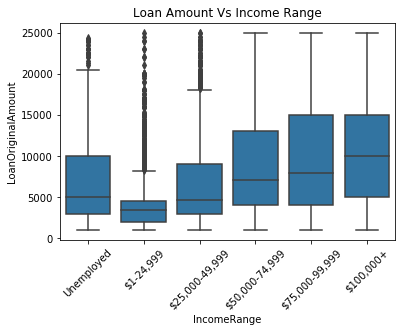

In [32]:
sb.boxplot(x=df_2.IncomeRange, y =df_2.LoanOriginalAmount, color = sb.color_palette()[0])
plt.xticks(rotation=45);
plt.title('Loan Amount Vs Income Range');

## Comparing Loan Amount to Income Range

Higher income range borrowers tend to take higher loans with respect to the income, this is true based on the increasing loan amount as you go to the higher income range. It is important to note that unemployed people have taken larger loan amounts than people earning USD1 - USD 24999.

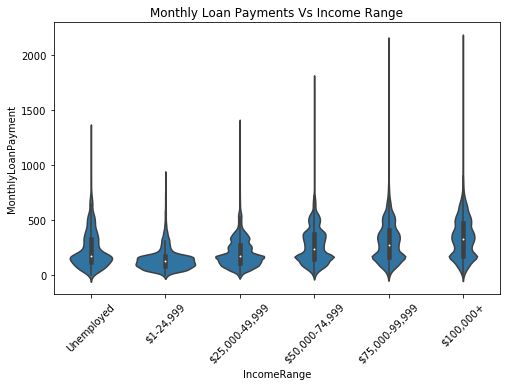

In [33]:
plt.figure(figsize=[8,5])
sb.violinplot(x=df_2.IncomeRange, y =df_2.MonthlyLoanPayment, color = sb.color_palette()[0])
plt.xticks(rotation=45);
plt.title('Monthly Loan Payments Vs Income Range');

## Comparing Monthly Loan Payment to Income Range

The income range at USD 1-24999 pay a much lower monthly loan amount compared to the other income ranges, and majority of its monthly payments are below USD 250. As the income range increases, the violin plot gets more evenly distributed from top to bottom, showing that as income increases the montly loan payments also increase. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this investigation, we started to understand how Income Range of the borrower can relate to the monthly loan payments, the total loan amount, APR, occupation, states and reasons for loans. From this investigatiion we identified the following:
* The average monthly loan payments and the requested loan amount increases with income range, while the Borrower's APR decreases with rising income range.
* A large percentage of borrowers have not specified their occupation across all income ranges.
* We have also identified a significant percentage of all borrower across each state are in the USD25,000-49,9999 and USD 50,000 - 74,999.
* Debt consolidation was the prevalent factor across all income ranges, especially for borrowers in the range of USD25,000-49,9999 and USD 50,000 - 74,999.

Additionally, Borrower APR based on Listing Creation Date showed a rising trend in the first 2 quarter of 2006, while peaking at year 2011 where it started fall down steadily. Also, it was identified that the borrowers APR decreases with rising monthly income.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, we can notice the trend that with higher income range, the borrower can benefit from lower APR, get higher loans and make larger payments to pay off their loans. Additionally, it was noticed that people who unemployed have had higher borrower's APR compared to people earning in the income range of USD1-25,000.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

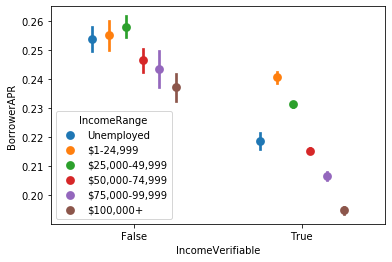

In [34]:
sb.pointplot(data = df_2, x = 'IncomeVerifiable', y = 'BorrowerAPR', hue = 'IncomeRange', linestyles="", dodge=0.5, )


Borrowers with a income range that cannot verified tend to have a much higher APR than the borrowers whom can verify their income range. It is also very noticeable in the vast difference between APRs for verifiable income range compared to the unverifiable borrowers. It is important to note that the even a verifiable income range, borrowers earning at USD1-24,999 have higher or equal APR when compared unverifiable borrowers in the income range of USD 75,000 and above.

In [35]:
data = df_2[['ListingCreationDate', 'IncomeRange', 'LoanOriginalAmount']]
data['quarterly'] =data.ListingCreationDate.dt.to_period('Q')
data.quarterly = data.quarterly.astype(str)
data =data.sort_values("quarterly")



/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quarterly Average Loan Amount Based on Income Range ')

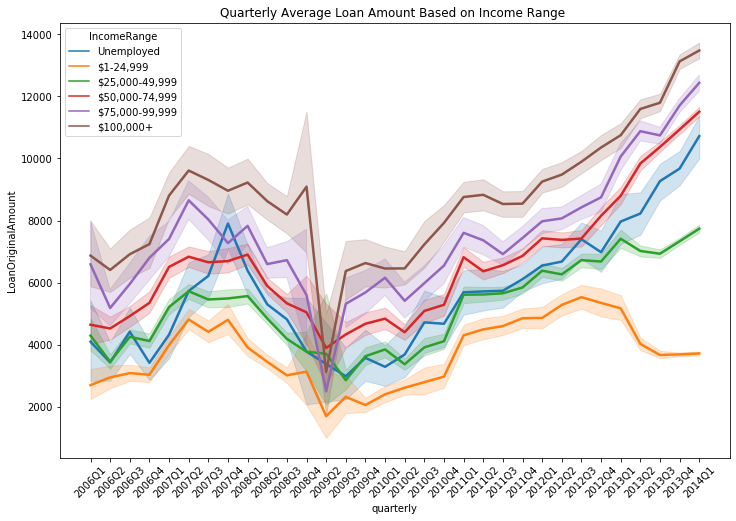

In [36]:
plt.figure(figsize=[12,8])
sb.lineplot('quarterly', 'LoanOriginalAmount', hue='IncomeRange', linewidth=2.5, data=data) 
plt.xticks(rotation=45);
plt.title("Quarterly Average Loan Amount Based on Income Range ")

## Quarterly Average Loan Amount Based on Income Range

From the period 2006 to 2008, loan amounts across all income ranges was steadily rising. However, at the 3rd quarter of year 2008 to the second quarter of year 2009, there is a significant drop in loan amount. Since then the average loan anmount at every quarter has been steadily increasing through out the years. We do notice a dip in the average loan amount for the Income Range USD1 -24,999, and from the 1st quarter of year 2011, the loan amount for the unemployed has over taken the average loan amount for Income Range USD25,000 - USD 49,000


In [37]:
#categorizing the Prosper Loan Rating 
rating= ['HR',"E", "D", "C", "B", "A", "AA"]
ratingclasses = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
df_2.ProsperRatingAlpha=df_2.ProsperRatingAlpha.astype(ratingclasses)

Text(0.5, 1, 'Loan Amount Vs Borrower APR Based on Prosper Rating')

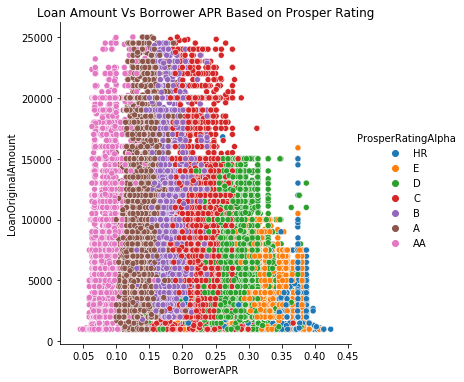

In [38]:
#plotting
sb.relplot(data = df_2, x = 'BorrowerAPR', y = 'LoanOriginalAmount', hue = 'ProsperRatingAlpha', )
plt.title('Loan Amount Vs Borrower APR Based on Prosper Rating')

## Loan Amount Vs Borrower APR Based on Prosper Rating

The Borrower's APR increase as the prosper loan rating decreases. We can see that AA Prosper Loans have the lowest APR, while the HR prosper rating has the highest APR. We can also notice that ther not many prosper loans have been handed out with rating D, E and HR and the average loan amount also decreases(lower the rating, lower the no. of loans as well as the amount of loan). While the opposite is true for the higher rated (AA,A,B and C) prosper loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Loan Amount based on income range across the years, shows that loan amount sharply drpped during the year of 2008 and picked up after year 2009. Since year 2009, the loan amount across all income ranges rose sharply. It was also observed, higher loan amounts are proportionate to the borrower's income range.
We also checked the Borrowers APR compared to whether the borrower income is verifiable, and this showed us that Borrowers APR with verifiable income is significantly higher than borrowers who cannot be verified. It was also noticed that the average borrower's APR for the verifiable income range was similar to borrowerer with unverifiable income of USD 75,000 and higher.
Finally, the Propser rating across different Loan Amounts and APR was investigated. Based on the findings, the better the Prosper rating the more likley the borrowers is going to recieve a lower APR. Low Prosper rated loans usually tend to have a loan amount less than USD 15,000 and the likelihood of issuing out the lowest Propser Rating, HR, to a loan is also less likely.

### Were there any interesting or surprising interactions between features?

When the Loan Origination Amount was compared over the years based on income range, we noticed the sharp fall in loan amounts requested in the financial year of 2008 and 2009. This may relate to the fact that the Global Recession of year 2008. Secondly, it was interesting to identify that certain borrowers of low income range with a verifiable income will still have a higher or equal APR to borrowers of a higher income range with unverifiable income.